In [16]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from scipy.stats import t
import statsmodels.api as sm
np.random.seed(0)

In [17]:
# X, y = data.load_diabetes(return_X_y=True)
# X, y = data.make_regression(n_samples=1000,n_features=10,noise=10)




n = 500
p = 5
iter = 5000


# X = np.random.normal(size = (n, p))
# y = np.random.normal(size = (n, 1))
# X = sm.add_constant(X)
def create_data(n, p):
    mu = 0
    noise = np.random.normal(0, 1, size = (n, 1))
    y = mu + noise
    
    return y
def model_fit(n, p):
    y = create_data(n, p)
    X = np.random.normal(0, 1, size = (n, p))
    X = sm.add_constant(X)
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

    return X, y, beta_hat


def calculate_p_value(X, y, beta_hat):
    residual = y - X @  beta_hat
    sigma_squared = (residual.T @ residual) / (n - p)
    var_beta_hat = sigma_squared * np.linalg.inv(X.T @ X)
    se_beta = np.sqrt(np.diag(var_beta_hat))
    t_stats = beta_hat.flatten() / se_beta
    p_values = 2 * (1 - t.cdf(np.abs(t_stats), df = n - p))

    return p_values

def record_p_values(n, p, iter):
    p_values_list = []
    for _ in range(iter):
        X, y, beta_hat = model_fit(n, p)
        p_values = calculate_p_value(X, y, beta_hat)

        p_values_list.append(p_values)

    return p_values_list

p_value_list = record_p_values(n, p, iter)


pvalues_df = pd.DataFrame(p_value_list, columns=['Intercept'] + [f'X{i + 1}' for i in range(p)])




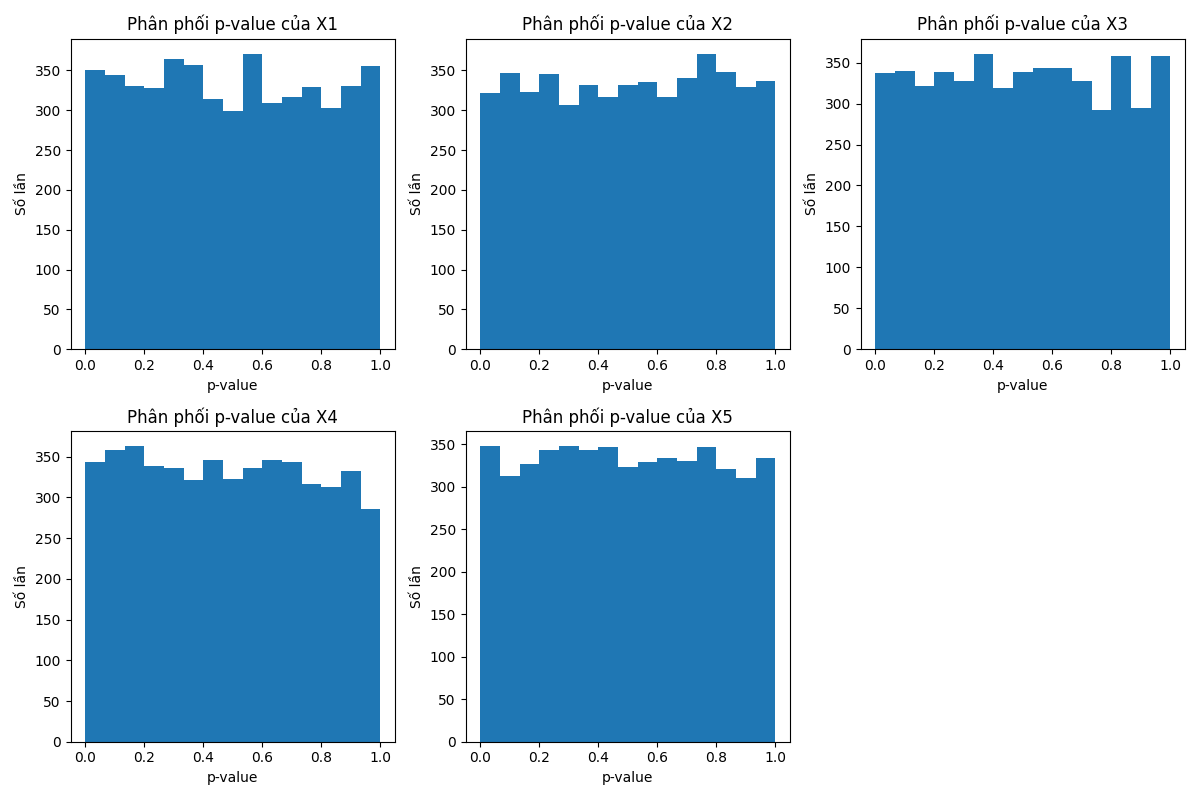

In [18]:
slope_columns = pvalues_df.columns[1:]


fig, axes = plt.subplots(2, 3, figsize = (12, 8))
axes = axes.flatten()

for idx, col in enumerate(slope_columns):
    axes[idx].hist(pvalues_df[col], bins = 15, range = (0, 1))
    axes[idx].set_title(f'Phân phối p-value của {col}')
    axes[idx].set_xlabel('p-value')
    axes[idx].set_ylabel('Số lần')








## Không quan trọng ##
for i in range(len(slope_columns), 6):
    plt.delaxes(axes[i])

plt.tight_layout()
plt.show()